In [7]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [8]:
x_train = np.array([0.15, 0.4])
y_train = np.array([300.0,500.0])

In [9]:
def compute_cost(x,y,w,b):
    m = x.shape[0]
    cost = 0

    for i in range(m):
        f_wb = w * x[i] + b
        cost = cost + (f_wb - y[i])**2
    total_cost = 1 / (2 * m) * cost

    return total_cost

In [10]:
def compute_gradient(x,y,w,b):
    m=x.shape[0]
    dj_dw = 0
    dj_db = 0

    for i in range(m):
        f_wb = w * x[i] + b
        dj_dw_i = (f_wb - y[i]) * x[i]
        dj_db_i = f_wb - y[i]
        dj_db += dj_db_i
        dj_dw += dj_dw_i

    dj_dw = dj_dw / m
    dj_db = dj_db / m
    return dj_dw, dj_db

In [11]:
def gradient_descent(x,y,w_in, b_in, alpha, num_iters, cost_function, gradient_function):
    J_history = []
    b = b_in
    w = w_in
    
    for i in range(num_iters):
        # Calculate the gradient and update the parameters using gradient_function
        dj_dw, dj_db = gradient_function(x, y, w , b)     

        # Update Parameters using equation (3) abovedef 
        b = b - alpha * dj_db                            
        w = w - alpha * dj_dw                            

        
        J_history.append(cost_function(x, y, w , b))

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")
 
    return w, b, J_history,  #return w and J,w history for graphing

In [18]:
w_init = 10
b_init = 10
iterations = 100000
tmp_alpha = 1.0e-2
w_final, b_final, J_hist = gradient_descent(x_train, y_train, w_init, b_init, tmp_alpha, iterations, compute_cost, compute_gradient)
print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")


Iteration    0: Cost 7.82e+04  dj_dw: -1.188e+02, dj_db: -3.872e+02   w:  1.119e+01, b: 1.38725e+01
Iteration 10000: Cost 2.04e+02  dj_dw: -2.342e+00, dj_db:  6.536e-01   w:  6.386e+02, b: 2.25031e+02
Iteration 20000: Cost 1.12e+01  dj_dw: -5.487e-01, dj_db:  1.531e-01   w:  7.622e+02, b: 1.90550e+02
Iteration 30000: Cost 6.14e-01  dj_dw: -1.285e-01, dj_db:  3.587e-02   w:  7.911e+02, b: 1.82472e+02
Iteration 40000: Cost 3.37e-02  dj_dw: -3.012e-02, dj_db:  8.404e-03   w:  7.979e+02, b: 1.80579e+02
Iteration 50000: Cost 1.85e-03  dj_dw: -7.056e-03, dj_db:  1.969e-03   w:  7.995e+02, b: 1.80136e+02
Iteration 60000: Cost 1.01e-04  dj_dw: -1.653e-03, dj_db:  4.613e-04   w:  7.999e+02, b: 1.80032e+02
Iteration 70000: Cost 5.57e-06  dj_dw: -3.873e-04, dj_db:  1.081e-04   w:  8.000e+02, b: 1.80007e+02
Iteration 80000: Cost 3.06e-07  dj_dw: -9.073e-05, dj_db:  2.532e-05   w:  8.000e+02, b: 1.80002e+02
Iteration 90000: Cost 1.68e-08  dj_dw: -2.125e-05, dj_db:  5.931e-06   w:  8.000e+02, b: 1.8

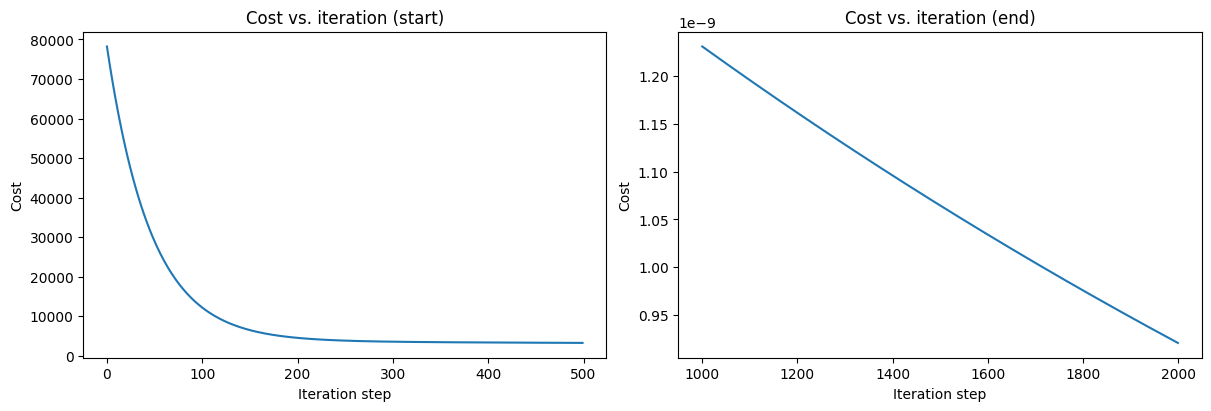

In [20]:
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))

# First subplot - plot the first 500 iterations (or adjust as needed)
ax1.plot(J_history[:500])
ax1.set_title("Cost vs. iteration (start)")
ax1.set_ylabel('Cost')
ax1.set_xlabel('Iteration step')

# Second subplot - plot the last 1000 iterations (adjust as needed)
ax2.plot(1000 + np.arange(len(J_history[-1000:])), J_history[-1000:])
ax2.set_title("Cost vs. iteration (end)")
ax2.set_ylabel('Cost')
ax2.set_xlabel('Iteration step')

plt.show()